## load the DB and explore

In [7]:
# create a connection
import pandas as pd
import sqlite3

con = sqlite3.connect(r"C:\Users\welde\Desktop\delivery-market-analysis\delivery-market-analysis\data\takeaway.db")
objects = pd.read_sql_query("""
SELECT name, type
FROM sqlite_master
WHERE type IN ('table','view')
ORDER BY type, name;
""", con)

objects



name   type
0                categories  table
1    categories_restaurants  table
2                 locations  table
3  locations_to_restaurants  table
4                 menuItems  table
5               restaurants  table
6           sqlite_sequence  table

## helper 

In [8]:
def q(sql: str, params=None) -> pd.DataFrame:
    return pd.read_sql_query(sql, con, params=params)


## 1. Categories

In [72]:
import pandas as pd

categories = q('SELECT * FROM categories order by restaurant_id;')
categories.head(1000)

id restaurant_id         name     item_id
0    O0P0P107      18-sushi        Menus   OPNQ7310Q
1    O0P0P107      18-sushi        Menus   O0335RN5Q
2    O0P0P107      18-sushi        Menus   ORNQ7310Q
3    O0P0P107      18-sushi        Menus   ON3Q7310Q
4    O0P0P107      18-sushi        Menus   O53Q7310Q
..        ...           ...          ...         ...
995  OQ7O070R      aba-jour     Starters  ORQ0ROP101
996  OQ7O070R      aba-jour     Starters  ONR0ROP101
997  OQ7O070R      aba-jour     Starters  ON53P5P101
998  OQ7O070R      aba-jour     Starters  O553P5P101
999  O1QO070R      aba-jour  Main dishes  O55QQOP101

[1000 rows x 4 columns]

## 2. Categories- restaurants

In [62]:
import pandas as pd

categories_restaurants = q('SELECT *  FROM categories_restaurants \
order by restaurant_id;')
categories_restaurants.head(100)

category_id  restaurant_id
0         sushi_51       18-sushi
1     japanese_551       18-sushi
2      salads_1456       18-sushi
3          thai_61  2bangkok-thai
4          wok_561  2bangkok-thai
..             ...            ...
95       greek_501          agora
96       grill_801          agora
97        fish_421          agora
98       indian_71           agra
99  sandwiches_671          agrea

[100 rows x 2 columns]

## 3. Locations

In [18]:
import pandas as pd

locations = q("""SELECT * FROM locations
              order by id desc;""")
locations.head(100)

ID  postalCode   latitude  longitude               city  \
0   2504        9400  50.818995   3.966288  Appelterre-Eichem   
1   2503        8660  51.101270   2.591424           De Panne   
2   2502        1755  50.773008   4.063802           Oetingen   
3   2501        9470  50.877341   4.065128        Denderleeuw   
4   2500        9680  50.816185   3.653858          Maarkedal   
..   ...         ...        ...        ...                ...   
95  2409        9300  50.940756   4.030959              Aalst   
96  2408        8340  51.201245   3.322646              Damme   
97  2407        9000  51.062663   3.723754              Ghent   
98  2406        9000  51.057038   3.716593              Ghent   
99  2405        9000  51.022701   3.701488              Ghent   

                                        name  
0                         Sint-Gertrudiskerk  
1                       Onze-Lieve-Vrouwkerk  
2                          Sint-Ursmaruskerk  
3              Onze-Lieve-Vrouw ter Noodkerk  
4                                  Het Marca  
..                                       ...  
95    Onze-Lieve-Vrouw van Meuleschettekapel  
96                         Sint-Martinuskerk  
97  Psychiatrisch Ziekenhuis Sint-Jan de Deo  
98                   Kerk Paters Karmelieten  
99                       Maaltebruggekasteel  

[100 rows x 6 columns]

## 4. Locations_to_restuarants

In [48]:
import pandas as pd

locations_to_restaurants = q('SELECT * FROM locations_to_restaurants;')
locations_to_restaurants.head(100)

restaurant_id  location_id
0          chitir-chicken-ninove            0
1                         hkebab            0
2                   juicy-ninove            0
3                          samis            0
4                      josephine            0
..                           ...          ...
95                    miss-pizza            3
96            pizza-hot-kruibeke            3
97             the-daily-beveren            3
98  king-pizza-more-sint-niklaas            3
99                  frituur-1830            3

[100 rows x 2 columns]

## 5. Menu items

In [19]:
import pandas as pd

menuitems = q('SELECT * FROM menuitems ' \
'order by id desc;')
menuitems .head(100)

primarySlug          id                    name  \
0        la-pizza-pazza-saint-gilles  RRRRRRQ0P1         Pizza maxi meat   
1   pizza-hut-delivery-deurne-zuid-2  RRRRRQQR71      Chicken Tasty (#4)   
2        pizza-hut-delivery-leuven-1  RRRRRQQR71      Chicken Tasty (#4)   
3      pizza-hut-delivery-overijse-1  RRRRRQQR71      Chicken tasty (#4)   
4         pizza-hut-delivery-aalst-2  RRRRRQQR71      Chicken Tasty (#4)   
..                               ...         ...                     ...   
95                   snack-express-1  RRRR1O1O71    Spaghetti bolognaise   
96                      het-grotteke  RRRR1N7371  Bitterballen (5 stuks)   
97                     mixte-kitchen  RRRR1511P1                  Brazil   
98                  yoki-sushi-grill  RRRR1371Q1                 Edamame   
99                  pizza-di-trevi-2  RRRR10RR71  Hot pepper passion (S)   

                                          description  price alcoholContent  \
0   'Base, jambon, salami, boeuf épicé, poivrons, ...  10.50              0   
1                                         '4 pièces.'   5.90              0   
2                                         '4 pièces.'   5.90              0   
3                                          '4 stuks.'   5.90              0   
4                                         '4 pièces.'   5.90              0   
..                                                ...    ...            ...   
95                                                     14.00              0   
96                                                      4.20              0   
97                                                      0.90              0   
98                                                      4.50              0   
99  'Tomato sauce, cheese, onion, bell pepper, jal...  11.95              0   

   caffeineContent  
0                0  
1                0  
2                0  
3                0  
4                0  
..             ...  
95               0  
96               0  
97               0  
98               0  
99               0  

[100 rows x 7 columns]

## 6. Restuarants

In [9]:

import pandas as pd

restaurants = q('SELECT * FROM restaurants;')
restaurants.head()




primarySlug restaurant_id                    name  \
0                pasta-pino      ONPO70QN              Pasta Pino   
1         da-barone-et-fils      00N7P37N       Da Barone et Fils   
2             pizza-gustosa      O031NNN1           Pizza Gustosa   
3  la-brezza-nova-rocourt-1      R0P3NPQN  La Brezza Nova Rocourt   
4             la-storia-ans      R5R5QNQN               La Storia   

                     address      city supportsDelivery  supportsPickup  \
0          Rue de Tournai 28  Mouscron                1               1   
1       route du condroz 202    Neupré                1               1   
2       Rue de Bruxelles 110     Awans                1               1   
3  Rue François-Lefèbvre 192     Liège                1               0   
4          Rue de l'yser 409     Liège                1               1   

                                   paymentMethods  ratings  ratingsNumber  \
0          ['bancontact', 'paypal', 'creditcard']      4.6             29   
1  ['bancontact', 'cash', 'paypal', 'creditcard']      3.0            139   
2  ['bancontact', 'cash', 'paypal', 'creditcard']      4.6           1382   
3          ['bancontact', 'paypal', 'creditcard']      4.3              8   
4          ['bancontact', 'paypal', 'creditcard']      4.2             10   

  deliveryScoober  durationRangeMin  durationRangeMax  deliveryFee  minOrder  \
0               0                15                40          3.0      15.0   
1               0                80               100          3.0      10.0   
2               0                20                45          4.0      25.0   
3               0                40                65          5.0      30.0   
4               0                45                70          5.0      55.0   

   longitude   latitude  
0   3.216888  50.743630  
1   5.460752  50.540992  
2   5.480206  50.675491  
3   5.549703  50.684180  
4   5.512421  50.663340

## 7. sqlte_squence

In [35]:
schema = q("""SELECT * FROM sqlite_sequence;
""")



#  --------------------ANALYSIS-----------------

## 1. Price distribution

In [39]:
prices_df = q("""
SELECT price
FROM menuItems
WHERE price IS NOT NULL;
""")

prices_df.head(100)

price
0    6.95
1    6.95
2   12.95
3   13.95
4   14.95
..    ...
95  17.50
96  16.50
97  16.95
98  16.50
99  16.50

[100 rows x 1 columns]

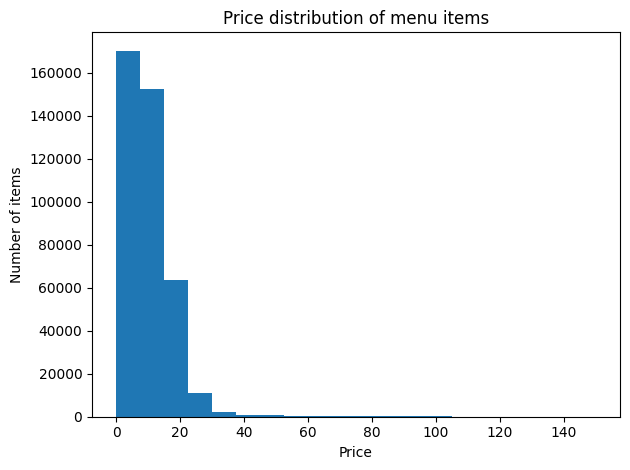

In [40]:
plt.figure()
plt.hist(prices_df["price"], bins=20)
plt.title("Price distribution of menu items")
plt.xlabel("Price")
plt.ylabel("Number of items")
plt.tight_layout()
plt.show()

In [42]:
bucket_counts = q("""
SELECT
  (CAST(price / 5 AS INT) * 5) AS bucket_start,
  (CAST(price / 5 AS INT) * 5) + 5 AS bucket_end,
  COUNT(*) AS n_items
FROM menuItems
WHERE price IS NOT NULL
GROUP BY bucket_start
ORDER BY bucket_start;
""")
bucket_counts



bucket_start  bucket_end  n_items
0              0           5   118044
1              5          10   101797
2             10          15   102999
3             15          20    53713
4             20          25    15924
5             25          30     4754
6             30          35     1459
7             35          40     1030
8             40          45      523
9             45          50      505
10            50          55      369
11            55          60      312
12            60          65      232
13            65          70      237
14            70          75      165
15            75          80      164
16            80          85      127
17            85          90       96
18            90          95       67
19            95         100       93
20           100         105       59
21           105         110       45
22           110         115       61
23           115         120       48
24           120         125       54
25           125         130       41
26           130         135       28
27           135         140       18
28           140         145       10
29           145         150        7
30           150         155       32

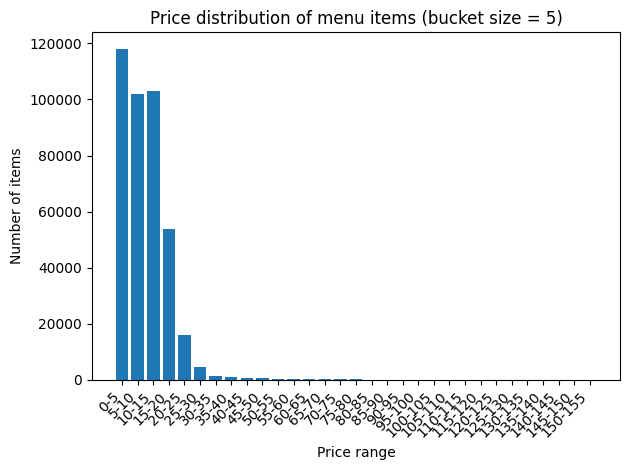

In [43]:
plt.figure()
labels = bucket_counts["bucket_start"].astype(int).astype(str) + "-" + bucket_counts["bucket_end"].astype(int).astype(str)
plt.bar(labels, bucket_counts["n_items"])
plt.title("Price distribution of menu items (bucket size = 5)")
plt.xlabel("Price range")
plt.ylabel("Number of items")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 2 . distribution of restaurants per location

price  n_items
0   14.0     4030
1   12.0     3305
2   12.5     2939
3   11.0     2836
4   13.0     2734
5   10.0     1972
6   13.5     1796
7   18.0     1790
8   15.0     1686
9   11.5     1499

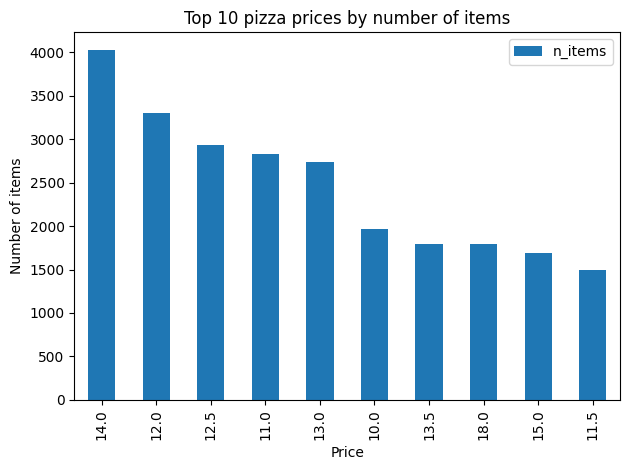

In [21]:
import matplotlib.pyplot as plt

ax = price_dis.plot(kind="bar", x="price", y="n_items")
plt.title("Top 10 pizza prices by number of items")
plt.xlabel("Price")
plt.ylabel("Number of items")
plt.tight_layout()
plt.show()


## distribution of restaurants per location

In [ ]:
restaurants_map = q(""" select count(DISTINCT
    restaurant_id) as num_of_restaurants, city from restaurants
    GROUP BY city
    ORDER BY num_of_restaurants DESC
    LIMIT 100;""")
restaurants_map.head(100)

num_of_restaurants        city
0                  437   Antwerpen
1                  309        Gent
2                  264   Bruxelles
3                  174      Leuven
4                  110  Schaerbeek
..                 ...         ...
95                   8      Anvers
96                   8    Aarschot
97                   7    Zonhoven
98                   7     Zelzate
99                   7  Willebroek

[100 rows x 2 columns]

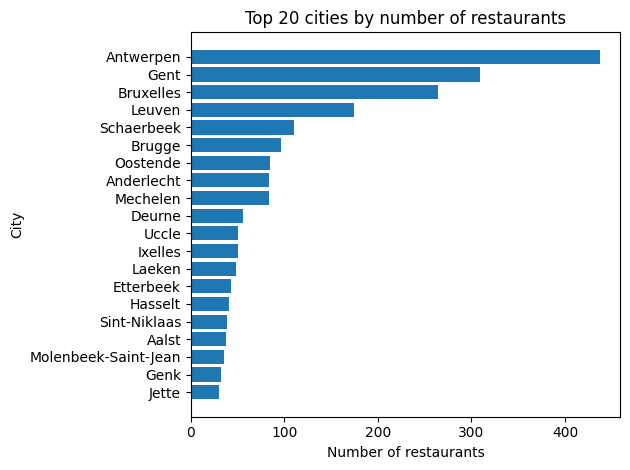

In [ ]:
import matplotlib.pyplot as plt

top = restaurants_map.head(20).sort_values("num_of_restaurants")

plt.figure()
plt.barh(top["city"], top["num_of_restaurants"])
plt.title("Top 20 cities by number of restaurants")
plt.xlabel("Number of restaurants")
plt.ylabel("City")
plt.tight_layout()
plt.show()


In [80]:
restaurants_map = q("""
SELECT
  name,
  latitude,
  longitude,
  city
FROM restaurants
WHERE latitude IS NOT NULL
  AND longitude IS NOT NULL;
""")
restaurants_map.head()

name   latitude  longitude      city
0              Pasta Pino  50.743630   3.216888  Mouscron
1       Da Barone et Fils  50.540992   5.460752    Neupré
2           Pizza Gustosa  50.675491   5.480206     Awans
3  La Brezza Nova Rocourt  50.684180   5.549703     Liège
4               La Storia  50.663340   5.512421     Liège

In [81]:
import folium

# center the map around the average coordinates
center_lat = restaurants_map["latitude"].mean()
center_lon = restaurants_map["longitude"].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

# add points
for _, row in restaurants_map.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=3,
        popup=row["name"],   # click to see restaurant name
        fill=True
    ).add_to(m)

m



## The top 10 pizza restaurants by rating

In [ ]:
top_10_pizza = q("""
SELECT city,
  COUNT() AS n_items
FROM menuItems
WHERE name LIKE '%pizza%'
  AND price IS NOT NULL
GROUP BY price
ORDER BY n_items DESC
LIMIT 10;
""")
price_dis


WindowsPath('C:/Users/welde/Desktop/delivery-market-analysis/delivery-market-analysis/data/exports')